In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [101]:
imagemOriginal = cv2.imread('xp.jpg') 

# passando  para escala de cinza
imagemCinza = cv2.cvtColor(imagemOriginal, cv2.COLOR_BGR2GRAY)

(Text(0.5, 1.0, 'Imagem original'), ([], []), ([], []))

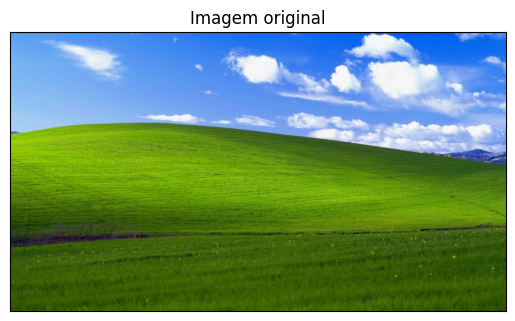

In [102]:
# plot da imagem original

imagemOriginal = cv2.cvtColor(imagemOriginal, cv2.COLOR_BGR2RGB)
plt.imshow(imagemOriginal)
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])

In [103]:
# aplicando fft 2d
fft2d = np.fft.fft2(imagemCinza)   

# deslocando o zero pro centro 
fftDeslocado = np.fft.fftshift(fft2d)
magnitude = np.abs(fftDeslocado)
histograma, bins = np.histogram(magnitude.ravel(), bins=255, range=(0, 255))

(0.0, 255.0)

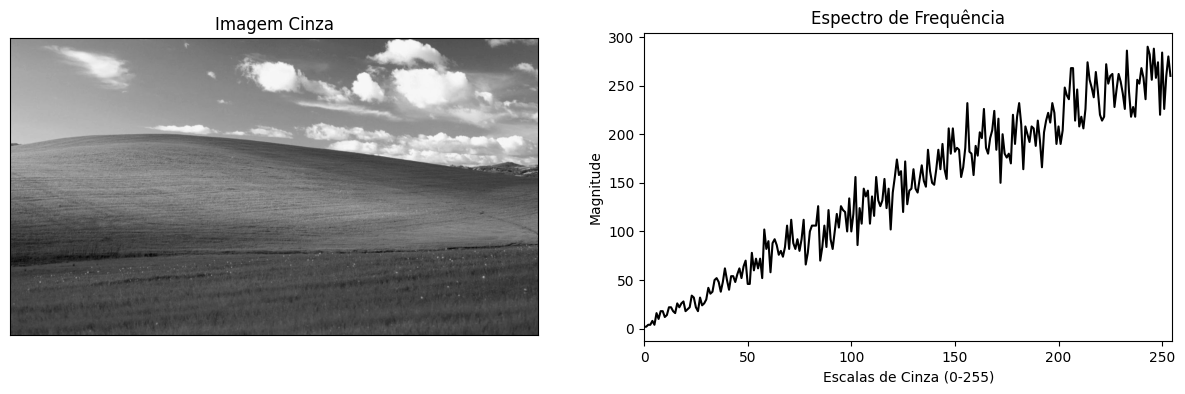

In [104]:
# plot da imagem cinza
plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.imshow(imagemCinza, cmap='gray')
plt.title('Imagem Cinza'), plt.xticks([]), plt.yticks([])

# plot espectro de frequência
plt.subplot(122)
plt.plot(histograma, color='black')
plt.title('Espectro de Frequência')
plt.xlabel("Escalas de Cinza (0-255)")
plt.ylabel("Magnitude")
plt.xlim(0, 255)

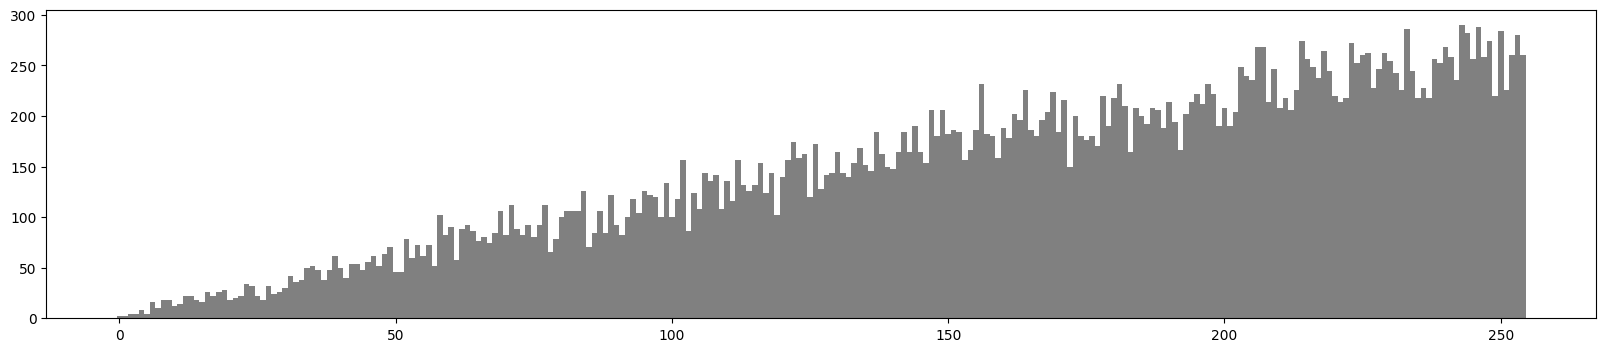

In [105]:
plt.figure(figsize=(20, 4))
plt.bar(range(len(histograma)), histograma, width=1, color='gray')
plt.show()

In [106]:
# filtragem no domínio da frequência

# filtro passa-baixa
R = 10  # raio do filtro
pixelLinha, pixelColuna = imagemCinza.shape
pixelLinhaCentro, pixelColunaCentro = pixelLinha // 2, pixelColuna // 2
mascara = np.zeros((pixelLinha, pixelColuna), np.uint8)
mascara[pixelLinhaCentro - R:pixelLinhaCentro + R, pixelColunaCentro - R:pixelColunaCentro + R] = 1

# aplicando o filtro
fftFiltro = fftDeslocado * mascara

In [107]:
# voltando pro domínio espacial

fftFiltroDeslocado = np.fft.ifftshift(fftFiltro)
imagemFiltrada = np.abs(np.fft.ifft2(fftFiltroDeslocado))

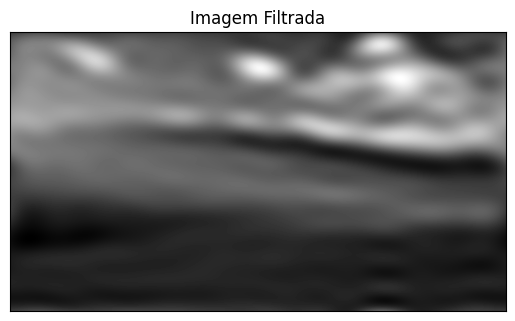

In [108]:
# imagem filtrada

plt.imshow(imagemFiltrada, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])
plt.show()